**Lecture 1: Nearest Neighbor Interpolation**

In this exercise, we


1.   Define an analytic function - something from numpy as sin function. Define something different than sin and cos.
2.   For 4 different numbers of sampling points (N) build interpolators based on nearest neighbor interpolation.
3.   Calculate errors and timings for different numbers of sampling points. Then, in one figure, plot the errors vs. N as a bar plot (also print on the screen); in another figure, plot the timings vs. N as a bar plot (also print on the screen).
4.   At the end, plot the exact function and interpolated values for different interpolants.



In [53]:
# First import the libraries we need:
# Numpy; scipy; time; and matplotlib
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time

In [54]:
# Define your exact function either using lambda or def
fex = lambda x: x**2+7*x+4

In [55]:
# CHOOSE SAMPLING POINTS AT WHICH CALCULATE THE EXACT VALUE AND BUILD INTERPOLANT
# Define the number of sampling points
N1 = 128
# Coordinates of the sampling points
x128 = np.linspace(0,1,N1)
# FUNCTION VALUES THAT WILL BE USED TO BUILD INTERPOLATION
f128 = fex(x128)

# Now for 256 points
N2 = 256
# Coordinates of the sampling points
x256 =np.linspace(0,1,N2)
# FUNCTION VALUES THAT WILL BE USED TO BUILD INTERPOLATION
f256 =fex(x256)

N3 = 512
x512 =np.linspace(0,1,N3)
f512 =fex(x512)

N4 = 1024
x1024 =np.linspace(0,1,N3)
f1024 =fex(x1024)



In [56]:
# Build an interpolation using nearest neighbor interpolation -- also time them
start128 = time.time()
finterp_nearest_128 = sc.interpolate.interp1d(x128,f128,kind='nearest')
end128 = time.time()
time128 = end128 - start128

start256 = time.time()
finterp_nearest_256 = sc.interpolate.interp1d(x256,f256,kind='nearest')
end256 = time.time()
time256 = end256 - start256

start512 = time.time()
finterp_nearest_512 = sc.interpolate.interp1d(x512,f512,kind='nearest')
end512 = time.time()
time512 = end512 - start512

start1024 = time.time()
finterp_nearest_1024 = sc.interpolate.interp1d(x1024,f1024,kind='nearest')
end1024 = time.time()
time1024 = end1024 - start1024

# do the same for the other Ns below (name them finterp_nearest_256,512,1024; time256,512,1024)

In [57]:
# Choose N = 128 random points to calculate function value using exact function and nearest neighbor interpolation
# This is the same xq for all finterp_nearest_
xq =np.random.rand(256)
# Exact function values at these points
fq =fex(xq)

# Calculate the interpolated function values
fval_nearest_128 = finterp_nearest_128(xq)


# repeat the same below for the other Ns
fval_nearest_256 = finterp_nearest_256(xq)
fval_nearest_512 = finterp_nearest_512(xq)
fval_nearest_1024 = finterp_nearest_1024(xq)



In [59]:
# Find the error in interpolation (maximum error) (do not divide by the maximum function value)
maxerr_nearest_128 =np.max(np.abs(fval_nearest_128-fq))
maxerr_nearest_256 =np.max(np.abs(fval_nearest_256-fq))
maxerr_nearest_512 =np.max(np.abs(fval_nearest_512-fq))
maxerr_nearest_1024 =np.max(np.abs(fval_nearest_1024-fq))



# Print the result as "The maximum error in nearest neighbor interpolation: "
print('The maximum error in nearest neighbor interpolation,for 128:', maxerr_nearest_128)
print('The maximum error in nearest neighbor interpolation,for 256:', maxerr_nearest_256)
print('The maximum error in nearest neighbor interpolation,for 512:', maxerr_nearest_512)
print('The maximum error in nearest neighbor interpolation,for 1024:', maxerr_nearest_1024)

The maximum error in nearest neighbor interpolation,for 128: 0.03507013554351168
The maximum error in nearest neighbor interpolation,for 256: 0.017219101757360633
The maximum error in nearest neighbor interpolation,for 512: 0.008397635859545005
The maximum error in nearest neighbor interpolation,for 1024: 0.008397635859545005


<function matplotlib.pyplot.show(close=None, block=None)>

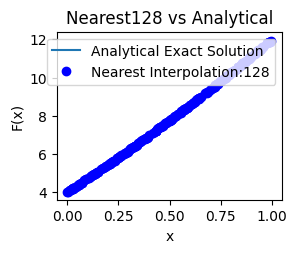

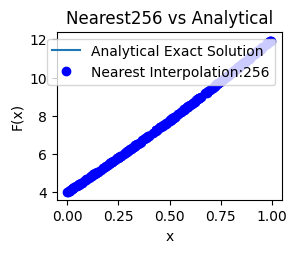

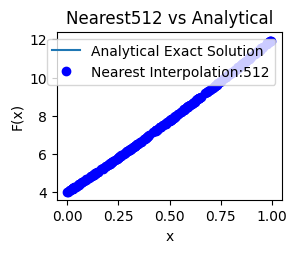

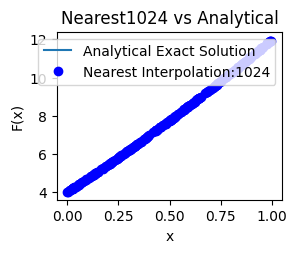

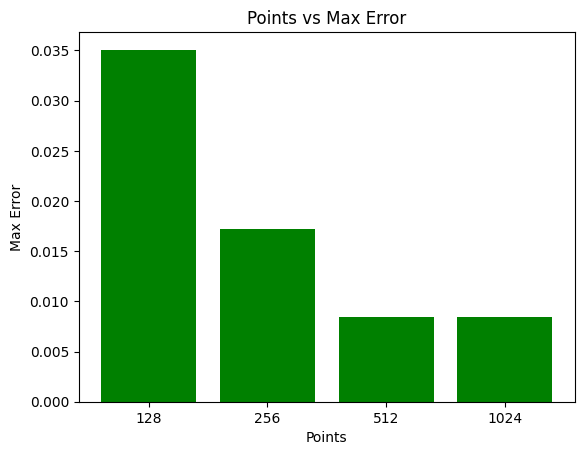

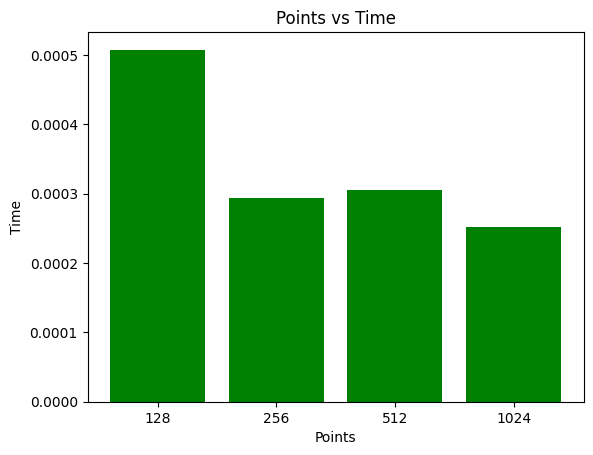

In [62]:
# Now visualize
# Plot the function itself as a black line and plot the interpolated values as blue circles
plt.figure()
plt.subplot(2,2,1)
plt.plot(x128, f128, label='Analytical Exact Solution')
plt.plot(xq, fval_nearest_128, 'bo', label='Nearest Interpolation:128')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Nearest128 vs Analytical')
plt.show

plt.figure()
plt.subplot(2,2,2)
plt.plot(x256, f256, label='Analytical Exact Solution')
plt.plot(xq, fval_nearest_256, 'bo', label='Nearest Interpolation:256')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Nearest256 vs Analytical')
plt.show

plt.figure()
plt.subplot(2,2,3)
plt.plot(x512, f512, label='Analytical Exact Solution')
plt.plot(xq, fval_nearest_512, 'bo', label='Nearest Interpolation:512')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Nearest512 vs Analytical')
plt.show

plt.figure()
plt.subplot(2,2,1)
plt.plot(x1024, f1024, label='Analytical Exact Solution')
plt.plot(xq, fval_nearest_1024, 'bo', label='Nearest Interpolation:1024')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Nearest1024 vs Analytical')
plt.show

#Bar Graphs
plt.figure()
x = ["128","256","512","1024"]
times = [maxerr_nearest_128, maxerr_nearest_256,maxerr_nearest_512,maxerr_nearest_1024]
plt.bar(x,times,color='green')
plt.xlabel('Points')
plt.ylabel('Max Error')
plt.title('Points vs Max Error')
plt.show


plt.figure()
x = ["128","256","512","1024"]
times = [time128, time256,time512,time1024]
plt.bar(x,times,color='green')
plt.xlabel('Points')
plt.ylabel('Time')
plt.title('Points vs Time')
plt.show



**Now use a different interpolation method -- linear interpolation -- instead of nearest neighbor using N = 128 and calculate the interpolated values at the same xq points above. Finally, show the error.**

The maximum error in linear interpolation,for 128: 1.550002927164229e-05


<function matplotlib.pyplot.show(close=None, block=None)>

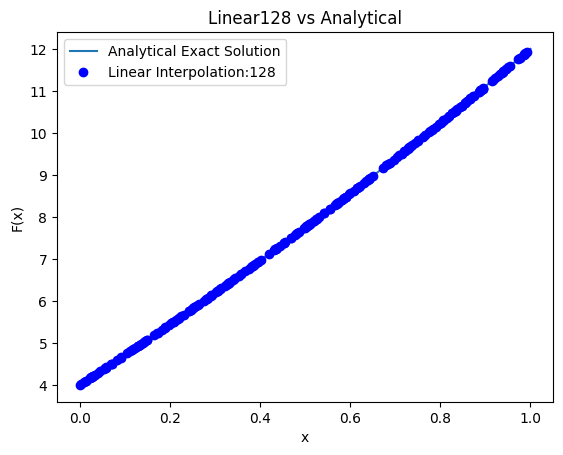

In [63]:

start128l = time.time()
finterp_lin_128 = sc.interpolate.interp1d(x128,f128,kind='linear')
end128l = time.time()
time128l = end128l - start128l
fval_linear_128 = finterp_lin_128(xq)
maxerr_linear_128 =np.max(np.abs(fval_linear_128-fq))
print('The maximum error in linear interpolation,for 128:', maxerr_linear_128)

plt.figure()
plt.plot(x128, f128, label='Analytical Exact Solution')
plt.plot(xq, fval_linear_128, 'bo', label='Linear Interpolation:128')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Linear128 vs Analytical')
plt.show